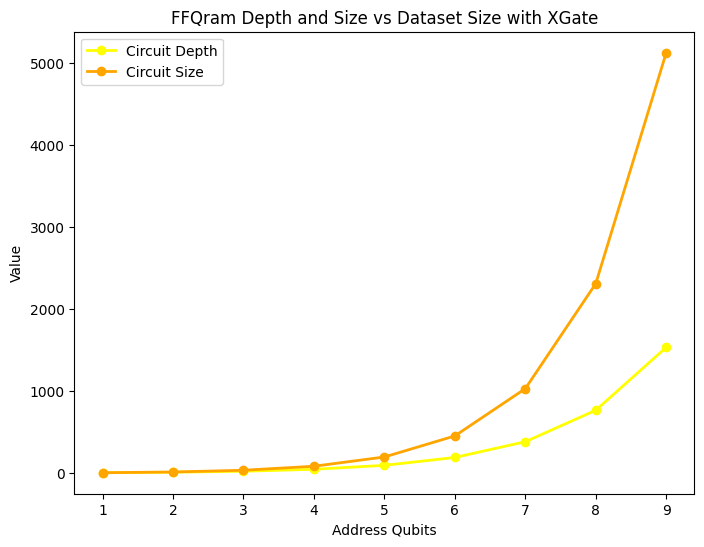

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import HGate, CXGate, RYGate, XGate
from numpy import arcsin, sqrt, pi
import math
from matplotlib import pyplot as plt
# Funzione per calcolare il valore di θ
def calculate_theta(value, max_value):
    X_N = value / sqrt(max_value)
    return 2 * arcsin(X_N)

# Funzione per calcolare la profondità e la dimensione del circuito per diverse dimensioni del dataset
def calculate_circuit_metrics(memory_values):
    max_value = sum([x**2 for x in memory_values])
    thetas = [calculate_theta(value, max_value) for value in memory_values]
    N = len(memory_values)
    n = int(math.log2(N))
    
    qaddr = QuantumRegister(n, 'addr')
    qdata = QuantumRegister(1, 'data')
    circuit = QuantumCircuit(qaddr, qdata)
    
    for qa in qaddr:
        circuit.append(HGate(), [qa])
    circuit.barrier()
    
    for i, el in enumerate(memory_values):
        theta = calculate_theta(el, max_value)
        binary_index = bin(i)[2:].zfill(n)
    
        for j, bit in enumerate(binary_index):
            if bit == '0':
                circuit.append(XGate(), [qaddr[j]])
    
        CRYGate = RYGate(theta).control(n)
        circuit.append(CRYGate, qaddr[:n] + [qdata[0]])
    
        for j, bit in enumerate(binary_index):
            if bit == '0':
                circuit.append(XGate(), [qaddr[j]])
    
        circuit.barrier()


    return circuit.depth(), circuit.size()

# Generare dataset di diverse dimensioni (potenze di 2)
dataset_sizes = [i for i in range(1, 10)]
depths = []
sizes = []

for size in dataset_sizes:
    memory_values = list(range(1, (2**size) + 1))
    depth, size = calculate_circuit_metrics(memory_values)
    depths.append(depth)
    sizes.append(size)


plt.figure(figsize=(8, 6))

# Tracciare Circuit Depth
plt.plot(dataset_sizes, depths, marker='o', color='yellow', linewidth=2, label='Circuit Depth')

# Tracciare Circuit Size
plt.plot(dataset_sizes, sizes, marker='o', color='orange', linewidth=2, label='Circuit Size')

# Aggiungere etichette e titolo
plt.xlabel('Address Qubits')
plt.ylabel('Value')
plt.title('FFQram Depth and Size vs Dataset Size with XGate')

# Aggiungere la legenda
plt.legend()

# Mostrare il grafico
plt.show()


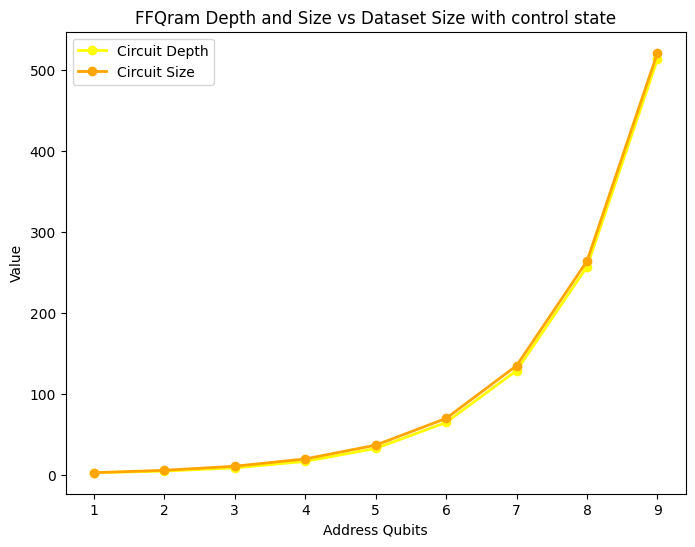

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import HGate, CXGate, RYGate, XGate
from numpy import arcsin, sqrt, pi
import math
from matplotlib import pyplot as plt
# Funzione per calcolare il valore di θ
def calculate_theta(value, max_value):
    X_N = value / sqrt(max_value)
    return 2 * arcsin(X_N)

# Funzione per calcolare la profondità e la dimensione del circuito per diverse dimensioni del dataset
def calculate_circuit_metrics(memory_values):
    max_value = sum([x**2 for x in memory_values])
    thetas = [calculate_theta(value, max_value) for value in memory_values]
    N = len(memory_values)
    n = int(math.log2(N))
    
    qaddr = QuantumRegister(n, 'addr')
    qdata = QuantumRegister(1, 'data')
    circuit = QuantumCircuit(qaddr, qdata)
    
    for qa in qaddr:
        circuit.append(HGate(), [qa])
    circuit.barrier()
    
    i=0
    for el in memory_values:
        theta=calculate_theta(el, max_value)
        binary_index = bin(i)[2:].zfill(n)
        CRYGate = RYGate(theta).control(n, ctrl_state=binary_index)
        circuit.append(CRYGate, qaddr[:] + [qdata[0]])
        i+=1
        circuit.barrier()


    return circuit.depth(), circuit.size()

# Generare dataset di diverse dimensioni (potenze di 2)
dataset_sizes = [i for i in range(1, 10)]
depths = []
sizes = []

for size in dataset_sizes:
    memory_values = list(range(1, (2**size) + 1))
    depth, size = calculate_circuit_metrics(memory_values)
    depths.append(depth)
    sizes.append(size)


plt.figure(figsize=(8, 6))

# Tracciare Circuit Depth
plt.plot(dataset_sizes, depths, marker='o', color='yellow', linewidth=2, label='Circuit Depth')

# Tracciare Circuit Size
plt.plot(dataset_sizes, sizes, marker='o', color='orange', linewidth=2, label='Circuit Size')

# Aggiungere etichette e titolo
plt.xlabel('Address Qubits')
plt.ylabel('Value')
plt.title('FFQram Depth and Size vs Dataset Size with control state')

# Aggiungere la legenda
plt.legend()

# Mostrare il grafico
plt.show()